In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# read in data

df_wsm = pd.read_csv('wsm.csv')
df_yem = pd.read_csv('yem.csv')
df_zaf = pd.read_csv('zaf.csv')
df_zmb = pd.read_csv('zmb.csv')
df_zwe = pd.read_csv('zwe.csv')

df = pd.concat([df_wsm,df_yem,df_zaf,df_zmb,df_zwe], ignore_index=True) 

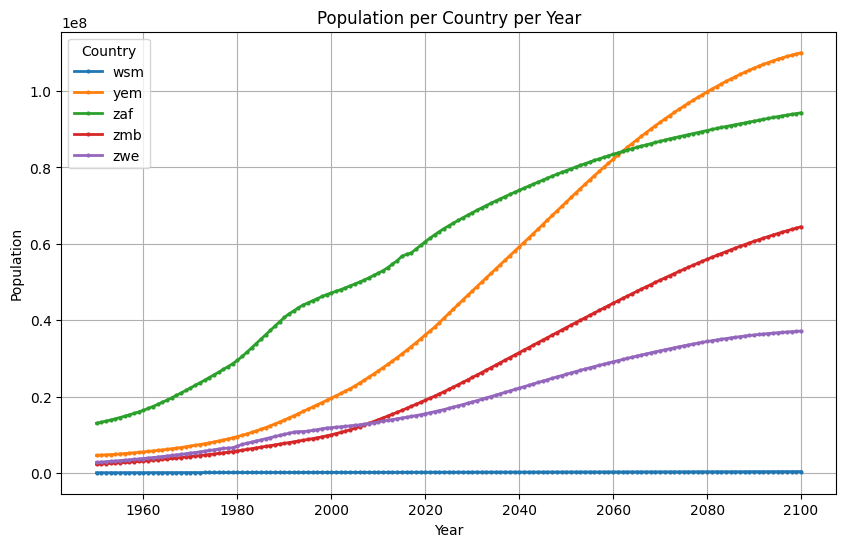

In [2]:
### Create a line plot comparing total population over time:
# choose 5 countries: wsm, yem, zaf, zmb, zwe 

# total population by country for each year

# groups by year and sums the population values of each group 
df_pop = df.groupby(['country', 'year'])['population'].sum().reset_index()
df_pop = df_pop.sort_values(['country', 'year'])
# display(df_pop.head()) 

# Line plot showing population trends
# Include a legend 
plt.figure(figsize=(10, 6))

for country,data in df_pop.groupby('country'):
    plt.plot(
        data["year"],
        data["population"],
        marker = 'o',
        markersize=2,
        linewidth=2,
        label = country
)

plt.title('Population per Country per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()


plt.legend(title='Country')
plt.show() 

/tmp/ipykernel_5459/2420496093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDates.loc[:,'Age Group'] = pd.cut(df['age'], bins=ageDist, labels=ageLabels) # categorizes ages from the age column into the groups specified in ageDist and assigns it to new column Age Group in the new datafarme dfDates


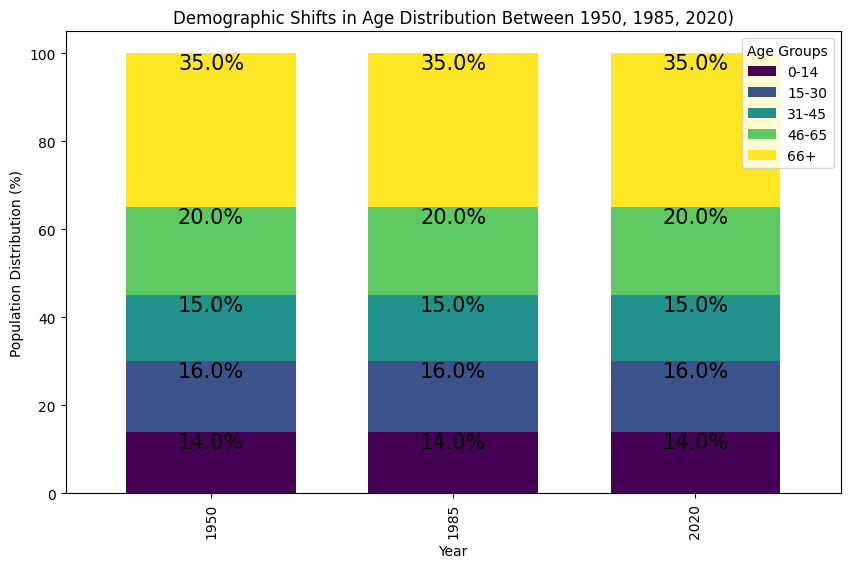

In [3]:
## create a stacked barplot 

ageDist = [0, 14, 30, 45, 65, float('inf')] # create the age distribution categories, float('inf) means infinity to accommodate 66+
ageLabels = ['0-14', '15-30', '31-45', '46-65', '66+']

dfDates = df[df['year'].isin([1950, 1985, 2020])] # filter dataframe for just 1950, 1985, and 2020 
 
dfDates.loc[:,'Age Group'] = pd.cut(df['age'], bins=ageDist, labels=ageLabels) # categorizes ages from the age column into the groups specified in ageDist and assigns it to new column Age Group in the new datafarme dfDates

# group by year and age columns and count all possible combinations, any missing combinations are filled with 0 
ageCounts = dfDates.groupby(['year', 'Age Group'], observed = False).size().unstack(fill_value=0)
# calculate percentage distribution of each group per year dividing the count of each age group by total count for that year
ageCountsPercent = ageCounts.div(ageCounts.sum(axis=1), axis=0) * 100 

# create subplots of these dimensions 
fig, dimensions = plt.subplots(figsize=(10, 6))


ageCountsPercent.plot(kind = 'bar',
                   stacked = True,
                   colormap = 'viridis',
                   ax = dimensions,
                   width = 0.7)

plt.title("Demographic Shifts in Age Distribution Between 1950, 1985, 2020)")
plt.xlabel("Year")
plt.ylabel("Population Distribution (%)")
plt.legend(title="Age Groups")

# loop through each bar on the plot
for percent in dimensions.patches:
    # get the height of the bar which is the same as the percentage 
    height = percent.get_height()
    # specifies where to print the pecentage on each bar 
    dimensions.annotate(f'{height:.1f}%', 
                (percent.get_x() + percent.get_width() / 2., percent.get_y() + height), 
                ha='center', va='top', fontsize=15, color = 'black')

plt.show()


/tmp/ipykernel_5459/1032059051.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmapData = dfYearCountry.groupby(['country', 'Age Group'])['population'].sum().unstack(fill_value=0)


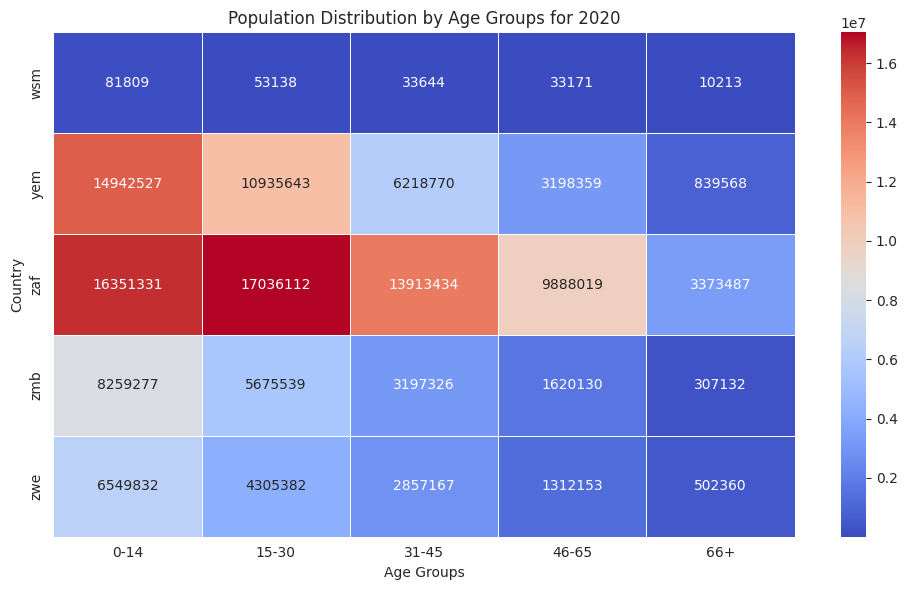

In [11]:
# Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.

countries = ['wsm', 'yem', 'zaf', 'zmb', 'zwe']
ageDistHeat = [0, 15, 31, 46, 66, float('inf')]  # Corrected bins for pd.cut
heatLabels = ['0-14', '15-30', '31-45', '46-65', '66+']  # Corrected labels
specificYear = 2020

# Filter DataFrame for the specific year and countries
dfYearCountry = df[(df['year'] == specificYear) & (df['country'].isin(countries))]

# Create Age Group column
dfYearCountry.loc[:, 'Age Group'] = pd.cut(dfYearCountry['age'], ageDistHeat, labels=heatLabels, right=False)

# Grouping data for heatmap
heatmapData = dfYearCountry.groupby(['country', 'Age Group'])['population'].sum().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.heatmap(heatmapData, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Population Distribution by Age Groups for 2020')
plt.xlabel('Age Groups')
plt.ylabel('Country')
plt.tight_layout() 
plt.show()

Heatmaps are a great way to visualize aggregrate values from the corresponding combination of variables. From this heatmap we can see that south africa has the highest population of people between the ages of 15-30, whereas Samoa has the lowest population of people between 15-60 years old. This heatmap tells us that south africa has a younger population and countries like Yemen or Zimbabwe have an aging population. 

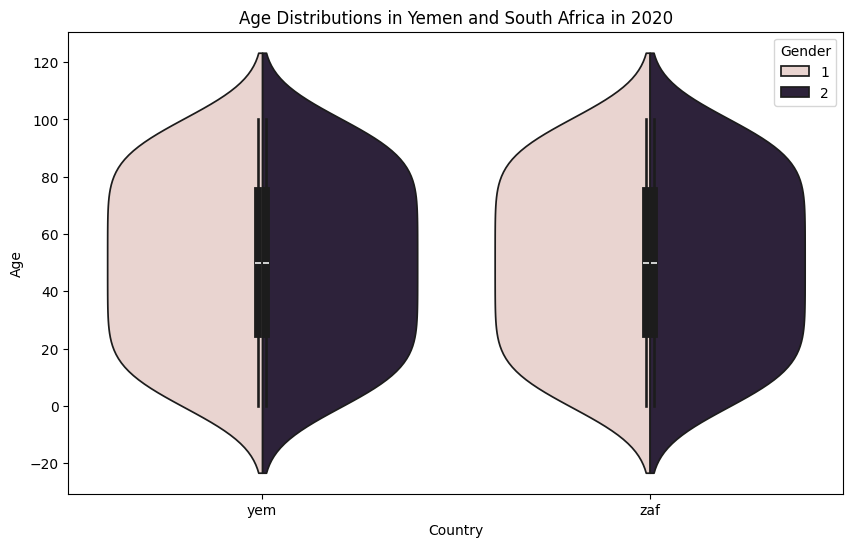

In [ ]:
# 2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

# select the countries you want to compare
countriesCompare = ['yem', 'zaf']
# fildter df for specific year and the countries you picked before s
df_2020 = df[(df['year'] == 2020) & (df['country'].isin(countriesCompare))]

# set dimensions of the violin plot
plt.figure(figsize=(10,6))

sns.violinplot(x = 'country',
               y = 'age',
               hue = 'gender', 
               data = df_2020,
               split = True
               )

plt.title('Age Distributions in Yemen and South Africa in 2020')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

These violin plots show that the ages in the respective populations of Yemen and South Africa are relatively similar between the male and female populations. 

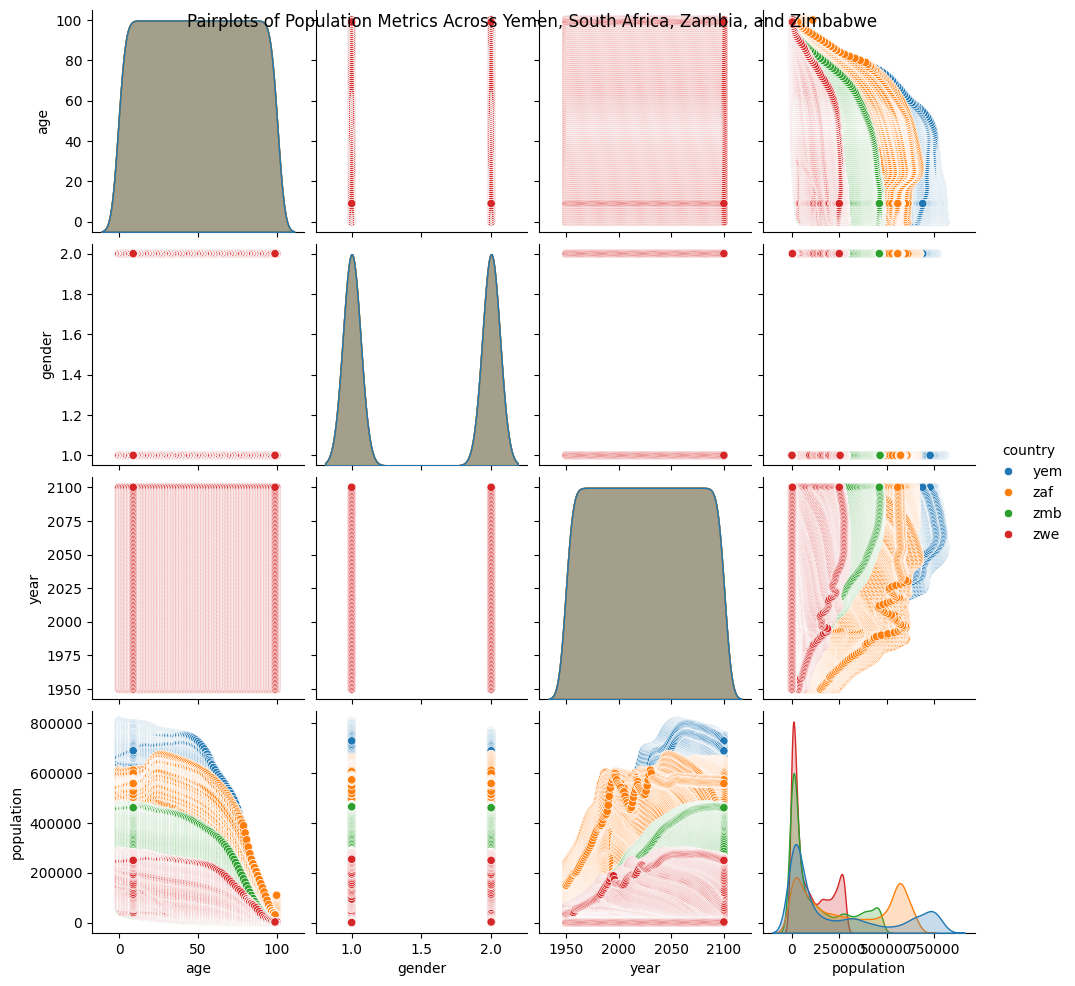

In [ ]:
# 3. Create a pairplot comparing population metrics across four countries:

countriesCompareFour = ['yem','zaf','zmb','zwe'] # select 4 countries 
df4countries = df[df['country'].isin(countriesCompareFour)] # filter the dataframe for the countries selected

sns.pairplot(
    df4countries,
    hue = 'country',
    diag_kind='kde'
)

plt.suptitle('Pairplots of Population Metrics Across Yemen, South Africa, Zambia, and Zimbabwe')
plt.show() 

Pair plots allow us to compare all variables to each other. For example, in this context, we can look at year versus population. This shows us that Yemen has had more of a population increase than the other countries. We can also look at population versus age. In this graph we see that as the population increases, with Yemen being the highest population, also has the highest number of people around the age of 50.    